# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | dilla
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | nelson bay
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | plettenberg bay
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 21 of Set 1 | broken hill
Processing Rec

Processing Record 37 of Set 4 | cherskiy
Processing Record 38 of Set 4 | sechura
Processing Record 39 of Set 4 | beringovskiy
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | hay river
Processing Record 42 of Set 4 | palas
Processing Record 43 of Set 4 | rakaia
Processing Record 44 of Set 4 | malanville
Processing Record 45 of Set 4 | jinji
Processing Record 46 of Set 4 | niquelandia
Processing Record 47 of Set 4 | tocopilla
Processing Record 48 of Set 4 | itarema
Processing Record 49 of Set 4 | krasnaya zarya
Processing Record 0 of Set 5 | kruisfontein
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | bethel
Processing Record 4 of Set 5 | constitucion
Processing Record 5 of Set 5 | geraldton
Processing Record 6 of Set 5 | touros
Processing Record 7 of Set 5 | flinders
Processing Record 8 of Set 5 | brigantine
Processing Record 9 of Set 5 | fair

Processing Record 24 of Set 8 | rio grande
Processing Record 25 of Set 8 | fairlie
Processing Record 26 of Set 8 | cocobeach
Processing Record 27 of Set 8 | andenes
Processing Record 28 of Set 8 | kurbnesh
Processing Record 29 of Set 8 | mackenzie
Processing Record 30 of Set 8 | gambela
Processing Record 31 of Set 8 | roald
Processing Record 32 of Set 8 | ndele
Processing Record 33 of Set 8 | oussouye
Processing Record 34 of Set 8 | aviles
Processing Record 35 of Set 8 | marawi
Processing Record 36 of Set 8 | itarare
Processing Record 37 of Set 8 | ginir
Processing Record 38 of Set 8 | jian
Processing Record 39 of Set 8 | tambovka
Processing Record 40 of Set 8 | iquitos
Processing Record 41 of Set 8 | we
City not found. Skipping...
Processing Record 42 of Set 8 | dingle
Processing Record 43 of Set 8 | katangli
Processing Record 44 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 45 of Set 8 | hithadhoo
Processing Record 46 of Set 8 | quatre cocos
Processing Record

Processing Record 10 of Set 12 | manokwari
Processing Record 11 of Set 12 | aswan
Processing Record 12 of Set 12 | velsk
Processing Record 13 of Set 12 | cortez
Processing Record 14 of Set 12 | namibe
Processing Record 15 of Set 12 | gimli
Processing Record 16 of Set 12 | ugoofaaru
Processing Record 17 of Set 12 | launceston
Processing Record 18 of Set 12 | jiayuguan
Processing Record 19 of Set 12 | buxton
Processing Record 20 of Set 12 | tecate
Processing Record 21 of Set 12 | novoselitskoye
Processing Record 22 of Set 12 | jacksonville
Processing Record 23 of Set 12 | cuiluan
Processing Record 24 of Set 12 | yaan
Processing Record 25 of Set 12 | safaga
Processing Record 26 of Set 12 | victor harbor
Processing Record 27 of Set 12 | svetlogorsk
Processing Record 28 of Set 12 | ust-tsilma
Processing Record 29 of Set 12 | sao jose da coroa grande
Processing Record 30 of Set 12 | wattegama
Processing Record 31 of Set 12 | izumo
Processing Record 32 of Set 12 | aanekoski
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data

city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,-15.91,85,100,1.54,CA,1676202330
1,albany,42.6001,-73.9662,-1.50,78,100,0.89,US,1676202330
2,east london,-33.0153,27.9116,30.52,62,20,2.57,ZA,1676202121
3,busselton,-33.6500,115.3333,18.90,66,1,8.31,AU,1676202027
4,khatanga,71.9667,102.5000,-28.11,98,100,0.55,RU,1676202332
...,...,...,...,...,...,...,...,...,...
564,koslan,63.4564,48.8989,-10.03,96,95,2.07,RU,1676202694
565,lastoursville,-0.8143,12.7287,37.56,33,33,0.48,GA,1676202695
566,seoul,37.5683,126.9778,7.66,63,75,2.57,KR,1676202603
567,komsomolsk,49.0097,33.6455,-0.77,74,64,7.98,UA,1676202696


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-15.91,85,100,1.54,CA,1676202330
1,albany,42.6001,-73.9662,-1.50,78,100,0.89,US,1676202330
2,east london,-33.0153,27.9116,30.52,62,20,2.57,ZA,1676202121
3,busselton,-33.6500,115.3333,18.90,66,1,8.31,AU,1676202027
4,khatanga,71.9667,102.5000,-28.11,98,100,0.55,RU,1676202332
...,...,...,...,...,...,...,...,...,...
564,koslan,63.4564,48.8989,-10.03,96,95,2.07,RU,1676202694
565,lastoursville,-0.8143,12.7287,37.56,33,33,0.48,GA,1676202695
566,seoul,37.5683,126.9778,7.66,63,75,2.57,KR,1676202603


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

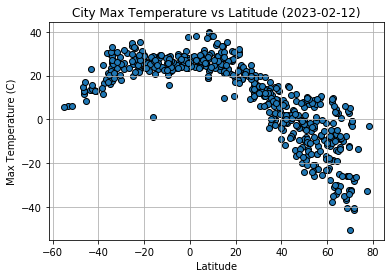

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Temperature vs Latitude (2023-02-12)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

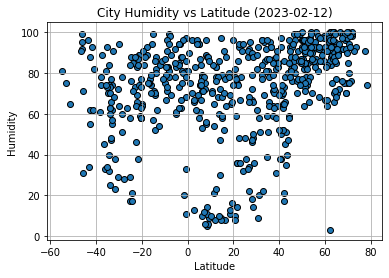

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Humidity vs Latitude (2023-02-12)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

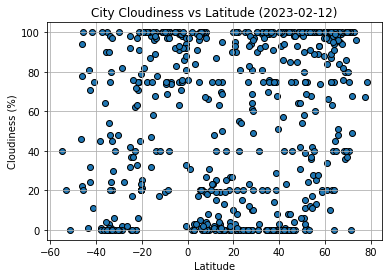

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("City Cloudiness vs Latitude (2023-02-12)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

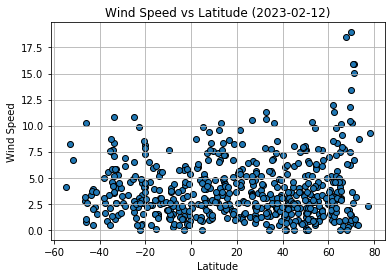

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude (2023-02-12)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def computeLinReg (x,y):
    plt.scatter(x,y,marker='o', edgecolor='black')
    plt.grid()

    slope,intercept,rvalue,pvalue,std_err=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq=print(f'The regression equation is y = {round(slope,2)}x + {round(intercept,2)}')
    r=print(f'The r-value is: {rvalue}')
    Rsq=print(f'R squared = {rvalue**2}')
    plt.plot(x,regress_values,"r-")
    
    plt.show()

    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head(12)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,-15.91,85,100,1.54,CA,1676202330
1,albany,42.6001,-73.9662,-1.50,78,100,0.89,US,1676202330
4,khatanga,71.9667,102.5000,-28.11,98,100,0.55,RU,1676202332
6,dilla,6.4100,38.3100,31.72,10,0,2.87,ET,1676202333
9,georgetown,5.4112,100.3354,29.97,74,20,3.09,MY,1676202136
11,lompoc,34.6391,-120.4579,7.74,81,20,1.34,US,1676202336
14,yellowknife,62.4560,-114.3525,-18.58,84,75,3.09,CA,1676202104
17,san patricio,28.0170,-97.5169,10.47,67,61,2.19,US,1676202340
19,botwood,49.1499,-55.3482,-12.83,86,31,3.23,CA,1676202342


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head(12)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,east london,-33.0153,27.9116,30.52,62,20,2.57,ZA,1676202121
3,busselton,-33.6500,115.3333,18.90,66,1,8.31,AU,1676202027
5,saldanha,-33.0117,17.9442,21.11,74,45,5.80,ZA,1676202332
7,mataura,-46.1927,168.8643,11.72,99,78,0.74,NZ,1676202333
8,rikitea,-23.1203,-134.9692,25.34,73,62,2.21,PF,1676202334
10,nelson bay,-32.7167,152.1500,23.94,91,30,4.02,AU,1676202335
12,plettenberg bay,-34.0527,23.3716,25.60,63,48,4.32,ZA,1676202337
13,kavieng,-2.5744,150.7967,26.96,81,98,6.10,PG,1676202337
15,chuy,-33.6971,-53.4616,27.25,47,24,3.50,UY,1676202339


###  Temperature vs. Latitude Linear Regression Plot

The regression equation is y = -0.77x + 35.52
The r-value is: -0.863266937972359
R squared = 0.7452298061961727


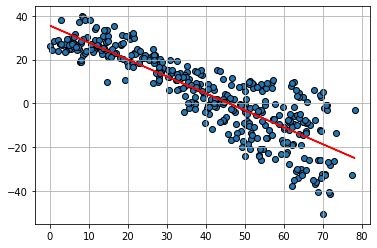

In [15]:
# Linear regression on Northern Hemisphere
computeLinReg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

The regression equation is y = 0.23x + 29.13
The r-value is: 0.5195970851001898
R squared = 0.26998113084461384


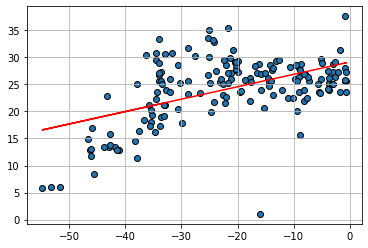

In [16]:
# Linear regression on Southern Hemisphere
computeLinReg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** In the Northern hemisphere, there is a strong negative correlation between max temperature and degrees of latitude. In other words, the further away from the equator (0 degrees latitude) a city is located, the lower the max temperature is. The R-squared number is 0.745 - i.e. changes in latitude (x) explain 74.5% of the changes in variable y, max temperature.

In the Southern hemisphere there is a weaker relationship between max temperature and latitude. However the figure shows that as latitude approaches 0, temperatures get warmer.

### Humidity vs. Latitude Linear Regression Plot

The regression equation is y = 0.52x + 53.6
The r-value is: 0.451611298621235
R squared = 0.2039527650423583


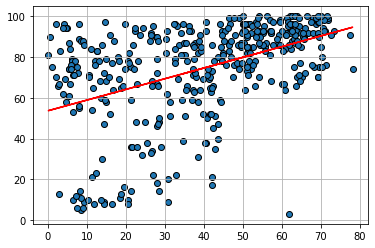

In [17]:
# Northern Hemisphere
computeLinReg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The regression equation is y = 0.28x + 76.92
The r-value is: 0.19485237023675447
R squared = 0.03796744618688124


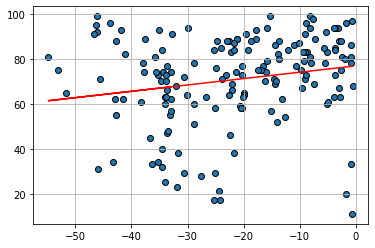

In [18]:
# Southern Hemisphere
computeLinReg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** There appears to be a weak linear relationship between Latitude and humidity in both northern and southern hemispheres. This means that in the northern hemisphere, humidity increases slightly as you move away from the equator; and in the south humidity increases as you approach the equator. However, the low R-squared scores suggest there may be external factors (not Latitude) that explains this.

### Cloudiness vs. Latitude Linear Regression Plot

The regression equation is y = 0.68x + 30.1
The r-value is: 0.3442863346763885
R squared = 0.11853308024490217


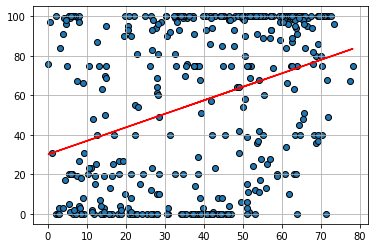

In [19]:
# Northern Hemisphere
computeLinReg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

The regression equation is y = 1.29x + 86.22
The r-value is: 0.4716060780144082
R squared = 0.22241229282013206


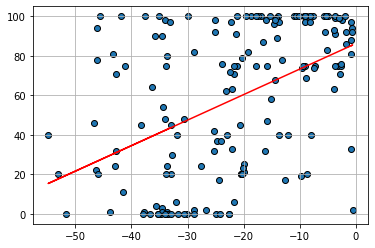

In [20]:
# Southern Hemisphere
computeLinReg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** There appears to be a weak linear relationship between Latitude and cloudiness in both northern and southern hemispheres. This means that in the northern hemisphere, cloud cover increases slightly as you move away from the equator; and in the south cloud cover slightly increases as you approach the equator. However, the low R-squared scores suggest there may be external factors (not Latitude) that explains this.

### Wind Speed vs. Latitude Linear Regression Plot

The regression equation is y = 0.01x + 3.57
The r-value is: 0.06767854124087412
R squared = 0.004580384944492699


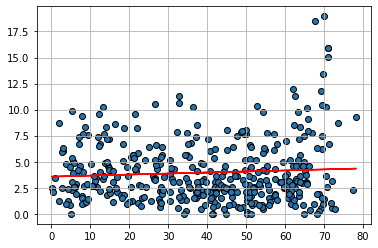

In [21]:
# Northern Hemisphere
computeLinReg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

The regression equation is y = -0.04x + 2.57
The r-value is: -0.2506337512974957
R squared = 0.06281727728945494


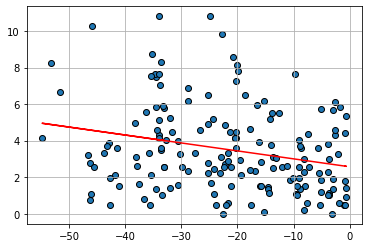

In [22]:
# Southern Hemisphere
computeLinReg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** There appears to be little to no linear relationship between Latitude and wind speed in either hemisphere.